In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data = pd.read_parquet('components_with_regression_targets.parquet')
data.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,eye_X,eye_Y
count,3.832200e+04,3.832200e+04,3.832200e+04,3.832200e+04,3.832200e+04,3.832200e+04,38322.000000,3.832200e+04,3.832200e+04,3.832200e+04,...,3.832200e+04,3.832200e+04,3.832200e+04,3.832200e+04,3.832200e+04,3.832200e+04,3.832200e+04,3.832200e+04,38322.000000,38322.000000
mean,-4.746593e-17,-2.373297e-17,4.153269e-17,4.449931e-17,-1.779972e-17,-1.008651e-16,0.000000,6.229903e-17,-2.669959e-17,-7.713214e-17,...,-2.892455e-17,-2.187883e-17,2.576093e-17,1.080499e-16,-1.075400e-17,-5.534602e-17,2.405744e-17,-4.774405e-18,0.082244,-0.053986
std,3.697791e+00,2.755740e+00,1.956760e+00,1.412980e+00,7.431430e-01,5.652298e-01,0.460725,4.030780e-01,3.985951e-01,3.804966e-01,...,4.055412e-02,3.605730e-02,3.431249e-02,3.350458e-02,3.252403e-02,3.225932e-02,3.178953e-02,3.083189e-02,0.317076,0.318821
min,-1.548567e+01,-9.367288e+00,-1.404643e+01,-7.634331e+00,-4.403351e+00,-2.004516e+00,-3.259388,-2.733705e+00,-2.142906e+00,-2.824245e+00,...,-1.501693e-01,-2.733489e-01,-2.214523e-01,-3.585965e-01,-1.950789e-01,-2.785928e-01,-2.280925e-01,-1.855395e-01,-0.989144,-0.999635
25%,-1.805712e+00,-1.887527e+00,-1.033650e+00,-8.699737e-01,-4.152212e-01,-3.728373e-01,-0.293530,-2.144127e-01,-2.604830e-01,-2.269570e-01,...,-2.519793e-02,-2.074653e-02,-2.101862e-02,-1.971863e-02,-1.981132e-02,-1.807278e-02,-2.043156e-02,-2.024153e-02,-0.068393,-0.267814
50%,5.999788e-02,-1.503922e-01,5.101390e-02,1.325613e-02,6.699076e-02,-7.602865e-03,-0.017806,4.115504e-03,-1.800698e-02,4.614505e-04,...,-3.072295e-03,-1.618603e-04,8.391740e-04,8.727783e-04,-3.929005e-04,-2.725390e-04,-7.920981e-04,-7.549612e-04,0.083432,-0.043277
75%,1.869653e+00,1.857017e+00,1.012489e+00,8.609366e-01,4.605075e-01,3.706816e-01,0.274625,2.078456e-01,2.454288e-01,2.247929e-01,...,2.294981e-02,1.866336e-02,2.181292e-02,2.073143e-02,2.009316e-02,1.745044e-02,1.955805e-02,1.970504e-02,0.241324,0.159705
max,1.664953e+01,1.071157e+01,1.431991e+01,1.018384e+01,5.663467e+00,5.663888e+00,4.092047,4.237547e+00,4.806410e+00,4.448403e+00,...,4.683094e-01,6.587882e-01,2.337440e-01,4.682018e-01,2.046093e-01,3.230030e-01,2.763353e-01,2.801326e-01,0.999055,0.986267


In [58]:
y = data[['eye_X', 'eye_Y']]
X = data.drop(columns=['eye_X', 'eye_Y'])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [60]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [61]:
y_pred = pipeline.predict(X_test)

In [62]:
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: [0.04093568 0.03790893]
R2 Score: [0.60113241 0.6325861 ]


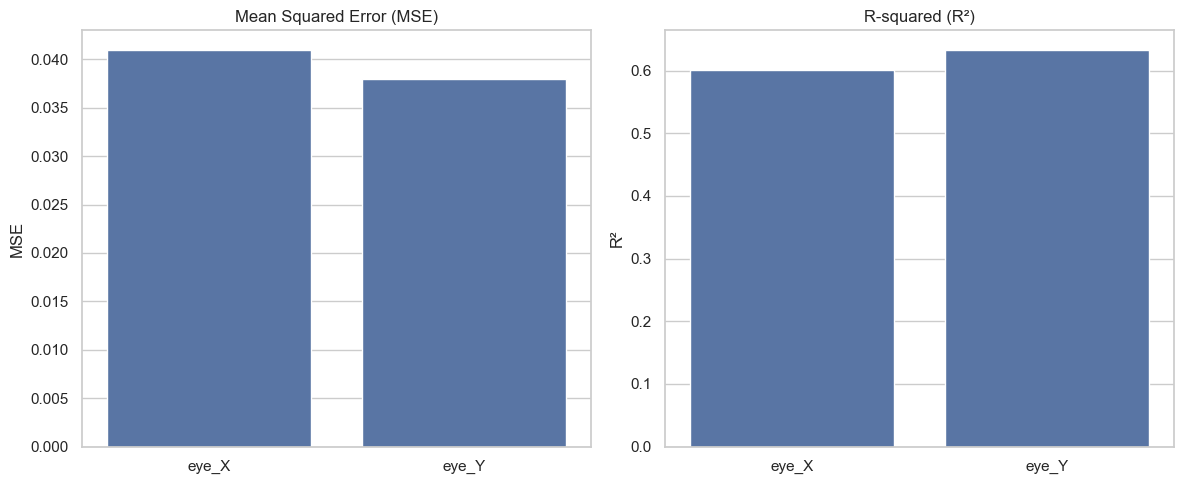

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set(style="whitegrid")

sns.barplot(x=["eye_X", "eye_Y"], y=mse, ax=axes[0])
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')

sns.barplot(x=["eye_X", "eye_Y"], y=r2, ax=axes[1])
axes[1].set_title('R-squared (R²)')
axes[1].set_ylabel('R²')

plt.tight_layout()
plt.show()

In [64]:
import pickle

with open('gaze_regressor.pkl', 'wb') as f:
    pickle.dump(pipeline, f)